In [1]:
from MDP import MountainCar, CartPole
from RLAlgorithms import ESGNStepSARSA, TrueOnlineSARSALambda
import matplotlib.pyplot as plt
import numpy as np

100%|██████████| 3000/3000 [01:04<00:00, 46.56it/s]


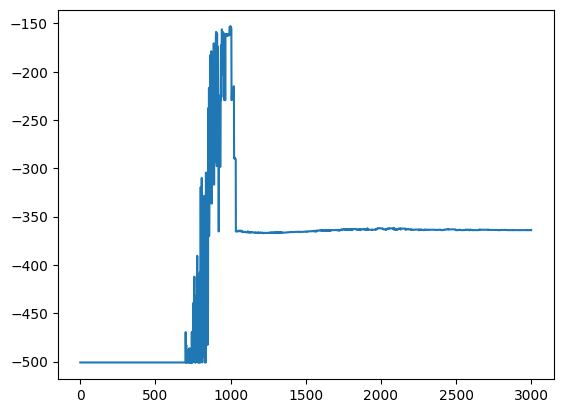

In [2]:
num_trials = 5
mc = MountainCar()

alg = TrueOnlineSARSALambda(mc, M=3, tdr=0.5, alpha=0.001, approach='epsilon-greedy')
Gs = np.zeros(alg.num_episodes)

for _ in range(num_trials):
    alg.reset()
    Gs += np.array(alg.run())

Gs /= num_trials

plt.clf()
plt.plot(range(len(Gs)), Gs)
plt.savefig(f'experiments/SARSALambda/MountainCar/lambda-{0.5}-alpha-{0.001}-ep-{3000}.png', facecolor='white')

100%|██████████| 2000/2000 [00:52<00:00, 38.20it/s]


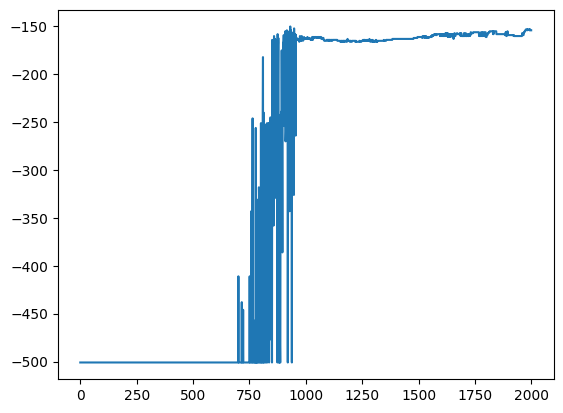

In [ ]:
mc = MountainCar()

alg = TrueOnlineSARSALambda(mc, M=3, tdr=0.5, alpha=0.001)

alg.reset()
Gs = alg.run()

plt.clf()
plt.plot(range(len(Gs)), Gs)